In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('train_lab3.csv')
test = pd.read_csv('test_data.csv')

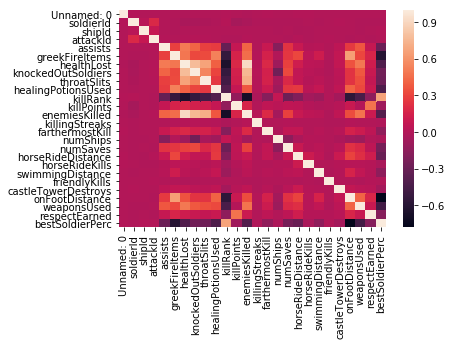

In [3]:
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [4]:
corr = data.corr()

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]
selected_columns = selected_columns[0:-1]
test = test[selected_columns]

X = data.drop(['bestSoldierPerc'],axis = 1)
y = data['bestSoldierPerc']

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(max_depth = 7,n_estimators = 300,random_state = 0)
model.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [6]:
y_pred = model.predict(test)

In [7]:
df_soln = pd.DataFrame(data = [test['soldierId'], y_pred], index = None)
df = df_soln.transpose()
df['soldierId'] = df['soldierId'].astype(float)
df.columns = ['soldierId','bestSoldierPerc']
df['bestSoldierPerc'] = df['bestSoldierPerc'].astype(int)
df.to_csv('soln grad boost.csv',index = False)